In [106]:
import pandas as pd

In [107]:
csv_path = 'D:\python\datasource\Lesson_05\sqlResult_1558435.csv'

In [108]:
content_read = pd.read_csv(csv_path, encoding='gb18030')

In [109]:
content = content_read.fillna(' ')

In [11]:
news_content = content['content'].tolist()

In [12]:
import jieba

In [13]:
def cut(string): return " ".join(jieba.cut(string))

In [14]:
import re

In [15]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [16]:
news_content = [token(n) for n in news_content]

In [17]:
news_content = [' '.join(n) for n in news_content]

In [18]:
news_content = [cut(n) for n in news_content]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.947 seconds.
Prefix dict has been built succesfully.


In [19]:
cut_news_file = 'D:\python\datasource\Lesson_05/news_sentences_cut.txt'

In [36]:
news_content_bak = []

In [35]:
news_content = []
i = 0
with open(cut_news_file, 'r') as f:
    for line in f:
        line = line.strip()
        if not line: continue
        news_content.append(line)
        i+=1
#         if i > 1000: break

In [34]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [52]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

D:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [57]:
cut_news = open(cut_news_file,'r', encoding = 'gb18030')
news_word2vec = Word2Vec(LineSentence(cut_news), size = 35, workers = 2)

In [63]:
news_model_file = 'D:\python\datasource\Lesson_05/news_model.word2vec'

In [64]:
news_word2vec.save(news_model_file)

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [65]:
news_word2vec.most_similar('葡萄牙',topn = 20)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('意大利', 0.8607771992683411),
 ('捷克', 0.8349997997283936),
 ('乌拉圭', 0.8151769638061523),
 ('摩洛哥', 0.8095852732658386),
 ('西班牙', 0.8076673746109009),
 ('克罗地亚', 0.7976622581481934),
 ('奥地利', 0.7904369831085205),
 ('比利时', 0.7897443771362305),
 ('里斯本', 0.7868384122848511),
 ('瑞士', 0.7851325273513794),
 ('巴塞罗那', 0.7773646116256714),
 ('科特迪瓦', 0.7735579013824463),
 ('瑞典', 0.7710144519805908),
 ('拉脱维亚', 0.7656701803207397),
 ('保加利亚', 0.7585082650184631),
 ('罗马尼亚', 0.7573979496955872),
 ('中国香港', 0.7546412944793701),
 ('比什凯克', 0.753187358379364),
 ('塞内加尔', 0.7498558163642883),
 ('伊斯坦布尔', 0.7478160262107849)]

In [68]:
news_word2vec.most_similar('说', topn = 30)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.9003854990005493),
 ('认为', 0.8808533549308777),
 ('指出', 0.854097306728363),
 ('坦言', 0.8283032178878784),
 ('看来', 0.8053152561187744),
 ('告诉', 0.8018031120300293),
 ('明说', 0.7765281796455383),
 ('透露', 0.7684462070465088),
 ('称', 0.7614436745643616),
 ('介绍', 0.7370367050170898),
 ('所说', 0.7213112711906433),
 ('强调', 0.7147173285484314),
 ('文说', 0.698815107345581),
 ('深有体会', 0.686731219291687),
 ('建议', 0.6643649339675903),
 ('特别强调', 0.6556874513626099),
 ('称赞', 0.6435617804527283),
 ('中说', 0.6281872391700745),
 ('时说', 0.6226491928100586),
 ('普遍认为', 0.6087743043899536),
 ('的话', 0.6058314442634583),
 ('提到', 0.6052500009536743),
 ('如是说', 0.5996004343032837),
 ('问', 0.581336498260498),
 ('相信', 0.5649849772453308),
 ('陈说', 0.5616301894187927),
 ('嚷嚷', 0.553462564945221),
 ('说道', 0.5520895719528198),
 ('资深', 0.5476036667823792),
 ('写道', 0.5435317754745483)]

In [69]:
news_word2vec.most_similar('认为', topn = 30)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('指出', 0.9250273108482361),
 ('表示', 0.9040745496749878),
 ('说', 0.8808533549308777),
 ('看来', 0.8412175178527832),
 ('坦言', 0.8115142583847046),
 ('称', 0.8002656102180481),
 ('普遍认为', 0.788804292678833),
 ('透露', 0.758671760559082),
 ('强调', 0.7420681118965149),
 ('建议', 0.7419277429580688),
 ('告诉', 0.698417603969574),
 ('所说', 0.6887749433517456),
 ('特别强调', 0.651387095451355),
 ('及其', 0.6277390122413635),
 ('介绍', 0.6244205236434937),
 ('呼吁', 0.622567892074585),
 ('观点', 0.618634819984436),
 ('提到', 0.6164605617523193),
 ('而言', 0.6159542202949524),
 ('声称', 0.6157487034797668),
 ('表明', 0.6153488755226135),
 ('对此', 0.6148720979690552),
 ('相信', 0.6079859137535095),
 ('明说', 0.6017995476722717),
 ('提及', 0.5938038229942322),
 ('中说', 0.59310382604599),
 ('质疑', 0.5823755264282227),
 ('直言', 0.581493616104126),
 ('所知', 0.579058051109314),
 ('电影界', 0.5775582790374756)]

In [70]:
news_model = Word2Vec.load(news_model_file)

D:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [71]:
from collections import defaultdict

In [73]:
def get_related_words(initial_words, model):
    unseen = initial_words
    seen = defaultdict(int)
    max_size = 500
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0:
            print('seen length : {}'.format(len(seen)))
        node = unseen.pop(0)
        new_expanding = [w for w, s in model.most_similar(node,topn=20)]
        unseen += new_expanding
        seen[node] += 1
    return seen

In [74]:
len(news_model.wv.vocab)

97927

In [75]:
related_words = get_related_words(['说', '表示'], news_model)

seen length : 0


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


seen length : 50
seen length : 100
seen length : 150
seen length : 150
seen length : 200
seen length : 200
seen length : 250
seen length : 300
seen length : 350
seen length : 350
seen length : 350
seen length : 400
seen length : 450
seen length : 450


In [79]:
related_words

defaultdict(int,
            {0: 0,
             2: 0,
             'SGR': 1,
             'xhszzb': 1,
             '一定': 1,
             '一峰': 6,
             '一方面': 2,
             '一点': 1,
             '一目了然': 1,
             '一篇': 4,
             '一贯': 7,
             '万钢': 4,
             '三军': 4,
             '上作': 4,
             '上称': 4,
             '不在意': 5,
             '不已': 1,
             '不禁': 1,
             '不能容忍': 4,
             '不见踪影': 1,
             '不难理解': 7,
             '专家建议': 5,
             '专程到': 1,
             '专访': 3,
             '严格遵守': 1,
             '中山大学': 7,
             '中称': 18,
             '中说': 39,
             '为什么': 1,
             '主张': 4,
             '之所以': 1,
             '也': 1,
             '了不起': 1,
             '了然于心': 1,
             '了解': 7,
             '事实上': 2,
             '亲眼所见': 2,
             '亲眼看到': 2,
             '介绍': 56,
             '从没': 1,
             '以及': 1,
             '任军': 1,
             '伊原': 4,
         

In [80]:
sorted(related_words.items(), key = lambda x:x[1], reverse=True)

[('坦言', 102),
 ('说', 101),
 ('指出', 100),
 ('表示', 92),
 ('所说', 92),
 ('认为', 81),
 ('透露', 76),
 ('看来', 73),
 ('提到', 66),
 ('特别强调', 60),
 ('告诉', 59),
 ('强调', 59),
 ('称', 56),
 ('介绍', 56),
 ('普遍认为', 52),
 ('明说', 48),
 ('文说', 45),
 ('建议', 40),
 ('中说', 39),
 ('呼吁', 36),
 ('深有体会', 32),
 ('称赞', 29),
 ('声称', 29),
 ('说道', 24),
 ('直言', 20),
 ('阐述', 20),
 ('时说', 19),
 ('还称', 19),
 ('解释', 19),
 ('中称', 18),
 ('写道', 16),
 ('引用', 16),
 ('谈谈', 16),
 ('而言', 14),
 ('提出', 14),
 ('提及', 14),
 ('知情', 14),
 ('证实', 14),
 ('列举', 14),
 ('如是说', 13),
 ('回答', 13),
 ('地说', 12),
 ('写信给', 12),
 ('觉得', 12),
 ('猜测', 12),
 ('咨询', 12),
 ('描述', 12),
 ('重申', 12),
 ('原话', 11),
 ('敦促', 11),
 ('批评', 11),
 ('武说', 10),
 ('确信', 10),
 ('眼中', 9),
 ('郭', 9),
 ('深有感触', 9),
 ('提醒', 9),
 ('表明', 9),
 ('来说', 8),
 ('相信', 8),
 ('南方日报', 8),
 ('聊起', 8),
 ('具名', 8),
 ('说出', 8),
 ('坚信', 8),
 ('时称', 8),
 ('现阶段', 8),
 ('及其', 7),
 ('观点', 7),
 ('反映', 7),
 ('肯定', 7),
 ('看到', 7),
 ('见到', 7),
 ('潘革平', 7),
 ('张隽玮', 7),
 ('宣称', 7),
 ('了解', 7),
 ('获悉', 

## TFIDF key words

In [32]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [33]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [34]:
document_frequency('的')

70342

In [35]:
import math

In [36]:
def idf(word):
    return math.log10(len(news_content) / document_frequency(word))

In [37]:
idf('的')

0.1051466115514474

In [38]:
idf('小米')

2.948039950009831

In [39]:
def tf(word, document):
    words = document.split()
    return sum(1 for w in words if w == word)

In [40]:
content['content'][11]

'?\r\n\u3000\u3000巨丰早评：市场将再次探底\r\n\u3000\u3000【巨丰观点】\r\n\u3000\u3000周四大盘冲高回落，2500余只个股下跌。上证50、沪深300指数顽强收红。早盘大盘低开高走，展开反弹，沪指冲破120日均线压力位；午后大盘跳水，个股普跌。盘面上，保险、电力、银行、民航机场、券商、房地产、人工智能、迪士尼、网络安全等板块涨幅居前。雄安新区、福州新区、医疗器械、丝绸之路等跌幅居前。\r\n\u3000\u3000金融股全线大涨：保险板块涨3%：新华保险、中国太保、中国人寿涨4%，中国平安涨2%；西水股份、天茂集团盘中大涨7%以上。银行板块涨2%：招商银行大涨8%，贵阳银行、兴业银行、浦发银行、兴业银行等涨幅居前。金融股是A股纳入MSCI指数的受益者，后市可以逢低关注。\r\n\u3000\u3000盘中万达电影、复星医药等白马股闪崩，导致午后市场出现大幅跳水。盘后消息，银监会于6月中旬要求各家银行排查包括万达、海航集团、复星、浙江罗森内里在内数家企业的授信及风险分析，排查对象多是近年来海外投资比较凶猛、在银行业敞口较大的民营企业集团。\r\n\u3000\u3000巨丰投顾认为自5月以来，大盘已经走出了3重底的走势，并开启中级反弹行情。沪指在上证50及白马股推动下率先反弹，但遭遇60日、120日均线强压力而出现调整。MSCI纳入A股后，沪深300指数创17个月新高，但2500余股下跌，市场分化明显。随着6月末市场流动性紧张的可能出现，市场将再次出现探底。建议投资者重点关注半年报大幅预增的错杀股和具备估值优势的大蓝筹。\r\n\u3000\u3000天信投资：尾盘跳水原因揭秘 伏击的品种曝光\r\n\u3000\u3000周四市场点评：\r\n\u3000\u3000沪深两市早盘纷纷低开，但是开盘之后权重板块崛起，其中保险和银行表现尤其明显，低矮动股指快速拉升，并顺势突破了60日均线和半年线的束缚；在主板拉升的过程中，市场的分化格局也较明显，题材板块和创业板表现相对较弱。不过虽然市场在早盘的上攻，但是成交量萎缩明教明显，所以这种上涨比较虚。果不其然，午后个股再度纷纷杀跌，同时股指也是顺势回落，沪市的半年线得而复失，形成长长的上影线；而创业板股指在回落的过程中失守5日均线的支撑。整体上周四市场全天保持宽幅震荡走势，尤其是沪

In [41]:
tf('银行',news_content[11])

6

In [42]:
tf('创业板',news_content[11])

6

In [43]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [44]:
idf('创业板')

2.506757120518876

In [45]:
idf('银行')

1.4550169427748936

In [49]:
idf('短期'),tf('短期',news_content[11])

(1.9923664854640575, 3)

In [93]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    tfidf = [(w, tf(w, document)*idf(w)) for w in words]
    tfidf = sorted(tfidf, key=lambda x:x[1], reverse=True)
    return tfidf[:]

In [51]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [83]:
news_content[11]

'巨丰 早评   市场 将 再次 探底   巨丰 观点   周四 大盘 冲高 回落   2500 余 只 个股 下跌   上证 50   沪 深 300 指数 顽强 收红   早盘 大盘 低开 高 走   展开 反弹   沪 指 冲破 120 日 均线 压力 位   午后 大盘 跳水   个股 普跌   盘面 上   保险   电力   银行   民航机场   券商   房地产   人工智能   迪士尼   网络安全 等 板块 涨幅 居前   雄安 新区   福州 新区   医疗器械   丝绸之路 等 跌幅 居前   金融股 全线 大涨   保险 板块 涨 3   新华 保险   中国 太保   中国 人寿 涨 4   中国 平安 涨 2   西水股份   天茂 集团 盘中 大涨 7   以上   银行 板块 涨 2   招商银行 大涨 8   贵阳 银行   兴业银行   浦发银行   兴业银行 等 涨幅 居前   金融股 是 A股 纳入 MSCI 指数 的 受益者   后市 可以 逢 低 关注   盘中 万达 电影   复星 医药 等 白马股 闪崩   导致 午后 市场 出现 大幅 跳水   盘后 消息   银监会 于 6 月 中旬 要求 各家 银行 排查 包括 万达   海航 集团   复星   浙江 罗森 内里 在内 数家 企业 的 授信 及 风险 分析   排查 对象 多 是 近年来 海外投资 比较 凶猛   在 银行业 敞口 较大 的 民营企业 集团   巨丰 投顾 认为 自 5 月 以来   大盘 已经 走出 了 3 重底 的 走势   并 开启 中级 反弹 行情   沪 指 在 上证 50 及 白马股 推动 下 率先 反弹   但 遭遇 60 日   120 日 均线 强 压力 而 出现 调整   MSCI 纳入 A股 后   沪 深 300 指数 创 17 个 月 新高   但 2500 余股 下跌   市场 分化 明显   随着 6 月末 市场 流动性 紧张 的 可能 出现   市场 将 再次出现 探底   建议 投资者 重点 关注 半年报 大幅 预增 的 错 杀 股 和 具备 估值 优势 的 大 蓝筹   天信 投资   尾盘 跳水 原因 揭秘   伏击 的 品种 曝光   周四 市场 点评   沪 深 两市 早盘 纷纷 低开   但是 开盘 

In [53]:
get_keywords_of_a_document(news_content[0])

[('MIUI', 13.953993984385477),
 ('机型', 5.854110917055407),
 ('体验版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('系统优化', 4.9523613237924735),
 ('精力', 4.865066660033509),
 ('内测', 4.17421007340883),
 ('官方消息', 3.9523613237924735),
 ('距今已有', 3.6301420290585544),
 ('更新换代', 3.433847383914586),
 ('用到', 3.339577467072738),
 ('确切', 3.139447967149618),
 ('有余', 3.0128420711738553),
 ('小米', 2.948039950009831),
 ('猜测', 2.6828483795745575),
 ('本周', 2.3069390544433817),
 ('其余', 2.2953054709353697),
 ('工程师', 2.2595144045152438),
 ('更新', 2.2143739974590426),
 ('暂停', 2.188933330229536),
 ('发布', 2.15877938610806),
 ('之中', 2.129539678489369),
 ('当然', 2.040139267260058),
 ('等待', 2.0327603000083627),
 ('有人', 1.7504182603908234),
 ('研发', 1.7322532357524185),
 ('手机', 1.7180971994136842),
 ('确保', 1.6071837072497697),
 ('含', 1.5902560044987006),
 ('集中', 1.558260021752429),
 ('时候', 1.5056688574209465),
 ('版', 1.4878717763585023),
 ('开发', 1.428354878235101),
 ('关于', 1.4239588

In [54]:
machine_new_keywords = get_keywords_of_a_document(news_content[10])

In [55]:
machine_new_keywords

[('蓝筹股', 8.663710003696664),
 ('私募', 5.837875136611048),
 ('成长', 5.366705316067451),
 ('行情', 4.6520419128348625),
 ('业绩', 4.383877680738523),
 ('股行情', 4.253391319456455),
 ('此消彼长', 3.838417971485637),
 ('王道', 3.806233288114236),
 ('stcn', 3.3841595997254785),
 ('强于', 3.3725777271756634),
 ('再起', 3.3612967167659744),
 ('成长性', 3.17421007340883),
 ('推动力', 3.126286521091647),
 ('证券时报', 3.1072632837782166),
 ('上证综指', 2.9885734964469184),
 ('一时间', 2.922977546107264),
 ('蓝筹', 2.7939988316972237),
 ('人士', 2.7918764048423768),
 ('www', 2.7676698929748746),
 ('切换', 2.7244746191788),
 ('上证', 2.628078868494781),
 ('com', 2.5475276071725355),
 ('估值', 2.5161986767517175),
 ('匹配', 2.513028629962211),
 ('创业板', 2.506757120518876),
 ('本轮', 2.381818383910576),
 ('看好', 2.347056277651364),
 ('日讯', 2.3385195019164042),
 ('绝对', 2.1613728487036576),
 ('多位', 2.107884148046792),
 ('月初', 2.0825431158131456),
 ('并非', 1.9589250932948619),
 ('06', 1.837416908079889),
 ('预期', 1.7988513344916361),
 ('指数', 1.778010726

In [57]:
news_content[101]

'中国 经济网 6 月 23 日讯   记者 刘瑾   日前   中国 机械 工业 百强 企业   汽车 三十 强 企业名单 出炉   在 由 中国 机械 工业 联合会   中国汽车工业协会 主办 的   中国 机械 工业 百强 企业   汽车 工业 三十 强 企业 信息 发布会   上   中国 机械 工业 联合会 会长 王瑞祥 指出   入围 企业 总体 呈现 了 持续增长 态势   2016 年 总 规模   平均 规模 均 创新 高   我国 机械 工业 总体 上 呈现 稳中 向 好 的 发展 态势   主要 经济指标 出现 恢复性 增长   同时   王瑞祥 也 表示   机械 工业 长期 积累 的 结构性 矛盾 还 没有 根本性 改变   新 的 发展 业态   发展 模式 远 未 形成   保持 平稳 健康 发展 的 基础 还 不 牢固   产业 升级   新旧 动能 转换   实现 由大 变强 任重道远   相关 数据 显示   2016 年 机械 百强 入围 企业 规模 是 15   4 亿元   比 上年 略 高   总 规模 达到 16992 亿元   平均 规模 169   92 亿元   两项 均 创新 高   相比 前 两年 的 前十强 排名   名单 基本 没有 什么 变化   只是 工程 机械行业 的 徐工   三一 和 中联重科 由于 之前 市场 环境 等 原因   整体 排位 后移 了 一 两位   但 仍 全部 在 十强 之 列   但 考虑 到 工程 机械行业 最近 以来 的 强烈 增长 态势   明年 该 行业 整体 恢复性 可能 较大   中机联 执行 副会长 陈斌 表示   机械 百强 的 年 换位 率 2005 年 曾 高达 32   此后 逐年 下降   2012 年降 至 6   不过 近几年 又 在 上升   2016 年 升至 22   说明 市场 动荡   不 确定 因素 增加   根据 中机联 公布 的 数据   2017 年 1 至 5 月 机械 增加值 增速 好于 去年 但 呈现 逐月 回落 的 态势   比如 1 至 5 月 增速 为 10   7   比 1 至 4 月 回落 0   2 点   此外 利润总额 也 出现 了 同样 的 走势   专家 分析   这是 由于 钢铁 等 原材料 价格 近

In [60]:
get_keywords_of_a_document(news_content[101])

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('中机联', 9.904722647584947),
 ('王瑞祥', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277902),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247)]

### Wordcloud

In [62]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [37]:
import wordcloud

In [82]:
font_files = 'D:\python\datasource\Lesson_05\SourceHanSerifSC-Regular.otf'

In [84]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [86]:
wc = wordcloud.WordCloud(font_files)

In [42]:
import matplotlib.pyplot as plt

In [88]:
wc.generate_from_frequencies?

In [89]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

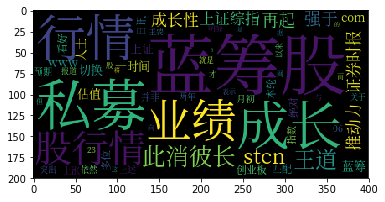

In [90]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [95]:
shenzhen_social_news = get_keywords_of_a_document(news_content[4])

In [96]:
shenzhen_social_news

[('刘青', 67.12860103609216),
 ('女子', 49.805410612821845),
 ('南坪', 23.465811831805492),
 ('交警', 15.805787932978273),
 ('坂田', 13.953993984385477),
 ('黄衣', 13.050903997393533),
 ('巡防', 11.328810194210376),
 ('了', 11.012005636840637),
 ('轻生', 10.382998889874603),
 ('护栏', 9.32178985133465),
 ('裸身', 9.302662656256985),
 ('坂雪岗', 9.302662656256985),
 ('她', 9.285022817533253),
 ('约会', 9.267115391016052),
 ('深圳', 9.139285494790956),
 ('发现', 8.685059498920872),
 ('蜀黍', 8.214526567556433),
 ('网友', 8.126865289542744),
 ('突然', 8.047379355439626),
 ('十多分钟', 7.746360155489698),
 ('内裤', 7.746360155489698),
 ('着', 7.69376356788892),
 ('铁骑', 7.496482682273098),
 ('大概', 7.478906508099729),
 ('缓慢', 7.465405004419699),
 ('龙岗', 7.181266975549762),
 ('快速路', 7.108842630240872),
 ('大道', 6.863158044709045),
 ('环城', 6.816586558884396),
 ('辅警', 6.7921176460503725),
 ('往前走', 6.722593433531949),
 ('走', 6.658635364608071),
 ('视频', 6.65823837544899),
 ('市民', 6.50820380832565),
 ('精神病', 6.4895822953890745),
 ('主干道', 6.4

In [40]:
from PIL import Image

In [41]:
import numpy as np

In [101]:
image_file = 'D:\python\datasource\Lesson_05/tam.png'

In [102]:
police_mask = np.array(Image.open(image_file))

In [103]:
wordcloud_with_mask = wordcloud.WordCloud(font_path = font_files, mask = police_mask)

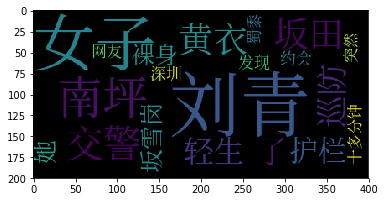

In [104]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

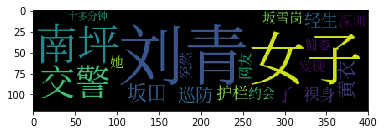

In [105]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

### TFIDF Vectorizezd

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorized = TfidfVectorizer(max_features = 10000)

In [48]:
news_content[:10]

['此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息',
 '骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台',
 '此前 的 一加 3T 搭载 的 是 3400mAh 电池   DashCharge 快充 规格 为 5V   4A   至于 电池 缩水   可能 与 刘作 虎 所说   一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关   按照 目前 掌握 的 资料   一加 手机 5 拥有 5   5 寸 1080P 三星 AMOLED 显示屏   6G   8GB   RAM   64GB   128GB   ROM   双 1600 万 摄像头   备货 量

In [49]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [50]:
X = vectorized.fit_transform(sub_samples)

In [51]:
X.shape

(50000, 10000)

In [112]:
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631], dtype=int64))

In [52]:
import random

In [114]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [115]:
document_id_1

963

In [116]:
document_id_2

907

In [117]:
news_content[document_id_1]

'庆 余年   近日   由 海南 广播电视 总台   华娱 时代 影业 和悦 凯 娱乐 联合 出品 的 古装 权谋 IP 大剧   庆 余年   确认 将 于 10 月 正式 开机   同时   出品 方 还 宣布   该剧 将 由 著名 导演 蒋家 骏 执镜   自 发布 影视 化 消息 以来   IP 巨制   庆 余年   一直 备受 行业 内外 关注   此番 确认 开机 时间 和 导演 人选   进行 行业 资源整合 的 矩阵式 打造 更是 引起 了 一石激起千层浪 的 连锁 效应   进一步 引爆 了 广大 书迷 和 观众 的 期待值   蒋家 骏   名导 执镜   权谋 题材 再焕 青春 生机   导演 蒋家 骏 一直 以 影视剧 执导 经验丰富   影视作品 画面 精美   时尚 气息 强烈 著称   早年 曾 被 称为   最会 拍 时尚 剧 的 导演   偶像剧 教父   而 他 用 一部 青春 版   射雕 英雄传   彰显 了 他 对 古装 题材 极强 的 驾驭能力   除了 以 接近 电影 的 镜头 语言 诠释 古装剧 广受 业内 赞誉 之外   更是 赋予 了 古装剧 无与伦比 的 青春 气息   更加 符合 当下 影视剧 受众 主力军 的 喜好 和 价值 取向   庆 余年   讲述 了 一个 普通 少年 为 探寻 母亲 身亡 之谜 只身 涉险 入朝   陷入 权谋 漩涡   最终 凭借 智勇 闯 出 一片 伟业 的 传奇 经历   少年 英雄 的 设定 从 根源 上 突破 了 传统 男频 权谋 的 固有 套路   取而代之 的 是 更 年轻化 的 表达方式   由此 不难看出   蒋家 骏 导演 无疑 与 全剧 整体 的 气质 定位 十分 契合   二者 将 碰撞 出 怎样 的 火花   一切 剧中 见分晓   庆 余年   万众瞩目   黄金卡 司 呼之欲出   虽然 此次 片方 放出 导演 和 开机 的 信息   然而 最令 广大观众 期待 的 卡司 阵容 却 仍然 犹抱琵琶半遮面   横向 比较 不难看出   相似 量级 的 IP 剧集 纷纷 祭出 了 超 一线 大 咖 的 黄金 阵容   令人 不由得 对   庆 余年   的 卡司 配置 平添 了 几分 期待   庆 余年   作为 男频 IP 的 扛鼎之作   深入 地

In [118]:
news_content[document_id_2]

'今日   由星 汇天姬 影视 传媒 出品 的 萌宠 动作 喜剧 合家欢 大 电影   营救 汪星 人   曝光 最新 剧照   除了 之前 亮相 的 主演 成毅 和 阿拉蕾 雅涵 以外   今日 揭开 了 部分 参演 的 其他 明星阵容   包括 综艺 小 天王 欧弟   家喻户晓 的 老戏骨 郑则仕   超级 萌娃 阿拉蕾 和 人气 萌娃 Jackson 周嘉诚   以及 近日 刚刚 疑似 公开 恋情 的 赵本山 女儿 球球 和 天佑 等   纷纷 亮相   让 这部 电影 增加 了 许多 看点   欧弟 变身   杀马特   司机   玩 嗨 现场   正在 青岛 紧张 拍摄 的 电影   营救 汪星 人   上周 迎来 一位   大牌   客串 嘉宾 欧弟   平日 以 主持 综艺节目 见长   口才 和 思维 反应 俱佳 的 欧弟   在 片中 饰演 一名 货车 司机   身穿 红色 紧身 皮 马甲   胳膊 上 缠 着 纹身 袖套   银灰色 头发 上 还 戴 着 发带   造型 十分   杀马特   喜剧效果 十足   据介绍   连续 两天 的 拍摄 虽然 遇上 大风 和 暴晒 天气   却 丝毫 没有 影响 欧弟 演技 的 发挥   剧情 十足 搞笑   而 欧弟 本人 也 在 片场 跟 几十条 狗狗 玩 嗨 了   忍不住 挂念 自己 家 的 宠物 狼犬   老戏骨 郑则仕 加盟   再现 经典 角色   肥猫   电影   营救 汪星 人   今日 曝出 的 剧照 中   出现 了 久违 的   肥猫   这一 经典 银幕 形象   香港 资深 老戏骨 郑则仕 在 十几年 演绎 的 小人物   肥猫   曾经 让 无数 观众 又哭又笑   印象 深刻   时隔多年 再次 穿 上   肥猫   经典 的 背带 牛仔裤   郑则仕 非常 开心   希望 这个 经典 角色 能 再度 唤起 一代人 的 儿时 回忆   而 生活 中 非常 喜欢 狗狗   家中 养 了 一只 比熊 的 郑则仕   在 拍戏 间隙 也 向 专业 训犬 师们   偷师   了 不少 实用 的 训犬 技巧   阿拉蕾 Jackson 人小鬼大   萌娃 出动 萌力 十足   今年 四月份 的 北京 电影节 开幕式 上   电影   营救 汪星 人   剧组 就 曾 以   男神

In [120]:
vector_of_d_1 = X[document_id_1].toarray()[0]
vector_of_d_1

array([0., 0., 0., ..., 0., 0., 0.])

In [121]:
vector_of_d_2 = X[document_id_2].toarray()[0]
vector_of_d_2

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
random_choose = random.randint(0, 1000)
random_choose

426

In [59]:
news_content[random_choose]

'原 标题   牟其中 出狱 后 首次 公开 亮相   召回 旧部 成立 南德 复业 小组   刚出狱 时 的 牟其中   这是 牟其中 自 去年 9 月 27 日 出狱 后 的 首次 参加 公开 活动   6 月 16 日 下午   由 中社 社会工作 发展 基金会 公和 基金 主办 的   公和 基金 2016 年度 公和 人物 颁奖礼   在 北京 举行   牟其中   夏宗伟 共同 获得 2016 公和 年度人物 候选 提名   如果 写作 民间 版 的 中国 当代史   必然 有 牟其中 的 故事   这是 牟其中 获奖 提名 理由 的 第一句   颁奖 会上   因为 这 两人 到来   而 引起 了 一阵 骚动   很多 慕名 者 前来 问候 和 合影   牟其中 说   他 需要 告诉 外界   出狱 9 个 月 以来 他 都 做 了 什么   最 重要 的 事情 就是   复业   重振 南德   此前 在 3 月 27 日   牟其中 选择 出狱 半年 的 这 一天   作为 南德 复业 的 开始   这 一天   一场   南德 智慧 文明 生产方式 研讨会   在 北京 门头沟区 的 一家 宾馆 举行   这里 距离 当年 牟其中 的 南德 宿舍楼 仅 有 10 分钟 的 步行 路程   1999 年 1 月 7 日   牟其中 就 是从 这个 宿舍楼 乘车 去往 南德 办公室 的 路上 被 抓捕   当天 参加 研讨会 的 80 多人 中   有 数位 南德 的 老 员工   现在 他们 又 有 了 一个 新 的 身份   南德 复业 筹备 小组 成员   组长 自然 就是 牟其中   再 一次 白手起家   再 一次 成功   就 能 证明 我 的 理论 是 正确 的   牟其中 说   辉煌 和 传奇 故事 都 是 过去 的   1   亮相   他 的 故事   在于 他奇 瑰 的 思考力   在此之前 曾 有 很多 论坛 和 会议 表达 了 希望 能 请 牟其中 出席 的 愿望   但 都 被 他 一一 推掉 了   对于 这次 获 年度人物 提名   牟其中 对夏宗伟 坦言   他 看重 的 并 不是 获得 提名   而是 因为 这次 大会 的 主办方 里 有 他 多年 信赖 的 老友   他 要 感谢 一份 几十年 不离 不弃 

In [104]:
from scipy.spatial.distance import cosine

In [105]:
def distance(v1, v2): return cosine(v1, v2)

In [127]:
distance([1,1], [2,2])

0.0

In [128]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.9888158668554633

In [129]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.9724811035087289

In [131]:
sorted(list(range(10000)), key=lambda i:distance(X[random_choose].toarray()[0], X[i].toarray()[0]))

D:\ProgramData\Anaconda3\lib\site-packages\scipy\spatial\distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[2,
 184,
 1232,
 440,
 61,
 6,
 91,
 87,
 81,
 92,
 96,
 105,
 112,
 106,
 102,
 84,
 83,
 114,
 89,
 101,
 86,
 85,
 93,
 95,
 97,
 108,
 110,
 90,
 94,
 98,
 80,
 82,
 88,
 99,
 100,
 103,
 246,
 217,
 993,
 1107,
 981,
 960,
 975,
 986,
 977,
 973,
 963,
 971,
 980,
 991,
 976,
 998,
 988,
 961,
 965,
 969,
 968,
 972,
 979,
 982,
 987,
 962,
 964,
 966,
 967,
 970,
 974,
 978,
 983,
 984,
 985,
 989,
 990,
 992,
 994,
 995,
 996,
 997,
 1149,
 157,
 540,
 1258,
 561,
 626,
 854,
 177,
 58,
 474,
 40,
 528,
 870,
 188,
 326,
 395,
 1214,
 1178,
 1245,
 421,
 649,
 729,
 480,
 447,
 1034,
 705,
 1259,
 56,
 405,
 370,
 1014,
 752,
 422,
 238,
 694,
 1127,
 477,
 0,
 244,
 32,
 373,
 276,
 8,
 205,
 796,
 1190,
 1219,
 1132,
 733,
 414,
 1249,
 1272,
 34,
 357,
 465,
 1,
 735,
 1197,
 471,
 413,
 343,
 427,
 831,
 468,
 191,
 356,
 1091,
 22,
 784,
 673,
 770,
 1004,
 1044,
 391,
 65,
 1064,
 890,
 350,
 432,
 397,
 410,
 1038,
 1013,
 1120,
 339,
 514,
 827,
 1022,
 168,
 1142,
 219

In [132]:
bin(19)

'0b10011'

### Build Search Engine

In [103]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    return news_ids

In [54]:
naive_search('美军 司令 航母'.split())

[2836,
 18925,
 18964,
 19225,
 19342,
 20428,
 30963,
 31211,
 31973,
 32328,
 35287,
 35490,
 35537,
 42915,
 42948,
 84924,
 86438]

In [55]:
len(news_content)

87052

### Input word -> the documents which contain this word

In [56]:
X.shape

(50000, 10000)

In [57]:
transposed_x = X.transpose().toarray()

In [60]:
word_2_id = vectorized.vocabulary_
word_2_id

{'此外': 6182,
 '本周': 5873,
 '12': 35,
 '小米': 3957,
 '手机': 4869,
 '15': 48,
 '机型': 5912,
 '其余': 1831,
 '暂停': 5722,
 '更新': 5743,
 '发布': 2619,
 '开发': 4390,
 '影响': 4511,
 '确保': 7324,
 '工程师': 4117,
 '可以': 2718,
 '集中': 9628,
 '全部': 1731,
 '精力': 7658,
 '进行': 9131,
 '工作': 4098,
 '有人': 5790,
 '猜测': 6868,
 '主要': 913,
 '研发': 7304,
 '之中': 934,
 '去年': 2543,
 '一年': 304,
 '时候': 5613,
 '当然': 4492,
 '关于': 1806,
 '信息': 1543,
 '我们': 4793,
 '还是': 9074,
 '等待': 7598,
 '作为': 1437,
 '唯一': 2946,
 '通过': 9243,
 '10': 12,
 '平台': 4242,
 '认证': 8552,
 '处理器': 3312,
 '强调': 4468,
 '不会': 551,
 '因为': 3024,
 '考虑': 7977,
 '性能': 4628,
 '核心': 6057,
 '相反': 7198,
 '他们': 1242,
 '联手': 8016,
 '微软': 4565,
 '找到': 4944,
 '一种': 346,
 '适合': 9184,
 '兼顾': 1851,
 '完美': 3763,
 '方案': 5523,
 '报道': 5017,
 '已经': 4141,
 '拿到': 5084,
 '一些': 254,
 '以便': 1259,
 '更好': 5740,
 '理解': 6956,
 '架构': 6009,
 '资料': 8790,
 '显示': 5688,
 '一款': 334,
 '集成': 9634,
 '传统': 1354,
 '节省': 8195,
 '至少': 8125,
 '30': 105,
 '空间': 7487,
 '按计划': 5115,
 '今年': 1217,
 '联想': 801

In [61]:
word_2_id['今天']

1216

In [63]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [64]:
id_2_word[6157]

'活力'

In [65]:
set(np.where(transposed_x[6159])[0])

{7,
 156,
 441,
 502,
 551,
 608,
 819,
 824,
 1176,
 1995,
 1997,
 2050,
 2194,
 2505,
 2813,
 3355,
 3422,
 3520,
 3688,
 3768,
 3807,
 3860,
 3868,
 4099,
 4169,
 4254,
 4408,
 4460,
 4487,
 4495,
 4498,
 4601,
 4608,
 4684,
 4743,
 4838,
 4893,
 4905,
 5042,
 5107,
 5191,
 5457,
 5487,
 5494,
 5594,
 5631,
 5670,
 5761,
 5871,
 6168,
 6377,
 6465,
 6986,
 7381,
 7596,
 7655,
 7661,
 7672,
 7777,
 7838,
 7875,
 7892,
 7918,
 8073,
 8121,
 8159,
 8163,
 8218,
 8315,
 8345,
 8358,
 8431,
 8612,
 8702,
 8840,
 8947,
 9293,
 9297,
 9843,
 11528,
 11562,
 12115,
 12120,
 12819,
 13312,
 13524,
 15112,
 15178,
 16988,
 17360,
 17559,
 17561,
 17565,
 17566,
 17567,
 17568,
 17569,
 17570,
 17675,
 17702,
 17778,
 18665,
 18669,
 19385,
 19540,
 20230,
 20364,
 20549,
 21806,
 22005,
 22023,
 22339,
 22791,
 23254,
 23290,
 23297,
 23298,
 23745,
 23823,
 24262,
 24291,
 24332,
 25289,
 25500,
 25925,
 25965,
 25975,
 25976,
 26364,
 26567,
 27783,
 28278,
 29603,
 29740,
 29879,
 29901,
 

In [66]:
word_2_id['美军']

7919

In [67]:
word_2_id['司令']

2752

In [68]:
usa_force = set(np.where(transposed_x[7922])[0])

In [69]:
commander = set(np.where(transposed_x[2769])[0])

In [70]:
usa_force & commander

{1259, 1890, 5591, 8164}

In [72]:
from functools import reduce

In [80]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [74]:
from operator import and_

In [81]:
reduce(and_,(d1, d2, d3))

{3}

In [111]:
def search_engine(query):
    words = query.split()
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    candidates_ids = [word_2_id[w] for w in words]
    documents_ids = [set(np.where(transposed_x[_id])[0]) for _id in candidates_ids]
    merged_documents = reduce(and_, documents_ids)
    sorted_documents_id = sorted(merged_documents, key=lambda i: distance(query_vec,X[i].toarray()))
    return sorted_documents_id

In [85]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

(array([2244, 6137, 7941], dtype=int64),)

In [86]:
text = """新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）"""

In [87]:
print(text)

新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。
　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。
　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。
　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）


In [88]:
import re

In [89]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [90]:
pat = r'(新闻|官员)'

In [91]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [92]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [93]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [94]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document)

In [95]:
highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

'\u3000\u3000新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\\n\u3000\u3000新华社记者刘莉莉\\n\u3000\u3000美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\\n\u3000\u3000（小标题）侧重对地攻击\\n\u3000\u3000据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\\n\u3000\u3000“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\\n\u3000\u3000“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\\n\u3000\u3000据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\\n\u3000\u3000（小标题）配角跻身主角\\n\u3000\u3000第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。\u3000\\n\u3000\u3000资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期

In [96]:
from IPython.display import display, Markdown

In [113]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)
        display(Markdown(title + '\n' + c))

In [114]:
search_engine_with_pretty_print('春节 假期')

## Search Result 0
????据新华社杭州6月22日电在22日召开的全国“互联网+人社”推进座谈会上，人力资源社会保障部负责人表示，9月底前基本实现跨省异地就医住院费用直接结算。
????人力资源社会保障部部长尹蔚民说，各地要把这项工作作为今年的重点督办任务，整合资源，加快接入国家异地就医结算系统，确保9月底前基本实现全国联网和跨省异地就医住院医疗费用直接结算任务目标。
????同时，要利用互联网技术创新医保服务模式，让群众就医更加便捷。“这方面各地都在积极探索，有不少借助手机客户端、微信等渠道开展医保服务的例子，值得认真总结，优化推广。”尹蔚民说。
????作为基础支撑，人力资源社会保障部正在推进社会保障卡的普及和应用，增强线上支付能力，力争尽快实现全国社会保障一卡通。


## Search Result 1
新华社照片，外代，2017年3月31日\n（外代二线）网球——迈阿密公开赛：费德勒晋级半决赛\n3月30日，瑞士选手费德勒庆祝胜利。\n当日，在2017迈阿密网球公开赛男单四分之一决赛中，瑞士选手费德勒以2比1战胜捷克选手伯蒂奇，晋级半决赛。\n新华社/欧新\n

## Search Result 2
 

## Search Result 3
新华社照片，外代，2017年5月4日\n（外代二线）足球——欧罗巴联赛：阿贾克斯胜里昂\n5月3日，里昂队球员瓦尔布埃纳（右）与对方球员拼抢。\n当日，在2016-2017赛季欧罗巴联赛半决赛首回合比赛中，荷兰阿贾克斯队主场以4比1战胜法国里昂队。\n新华社/路透AI

## Search Result 4
中国信达资产管理股份有限公司湖北省分公司债权转让公告 ????湖北日报讯?经财政部及银监会批准，中国信达资产管理公司改制为中国信达资产管理股份有限公司，原中国信达资产管理公司各办事处机构名称统一变更为“中国信达资产管理股份有限公司XX省（自治区、直辖市、计划单列市）分公司”，简称“中国信达XX分公司”。据此，中国信达资产管理公司武汉办事处名称变更为中国信达资产管理股份有限公司湖北省分公司,　简称“中国信达湖北分公司”。 ????根据中国信达湖北分公司与枝江金润源建设投资控股集团有限公司（以下简称“金润源公司”）签订的债权转让合同，中国信达湖北分公司已将依法享有的对下列借款人和担保人的债权及担保权利依法转让给金润源公司，现以公告方式通知债务人和担保人。请借款人和相应担保人或借款人、担保人的承继人向金润源公司公司履行还款义务（若借款人、担保人因各种原因发生更名、改制、歇业、吊销营业执照或者丧失民事主体资格等情形，请相关承债主体、清算主体代为履行义务或者承担清算责任）。 ????特此公告 　　中国信达资产管理股份有限公司湖北省分公司 　　2017年6月22日 
 ? ?

## Search Result 5
新华社照片，外代，2017年4月30日\n（外代二线）印度纪念国际舞蹈日\n4月29日，在印度加尔各答，舞蹈演员表演节目，纪念国际舞蹈日。\n4月29日是国际舞蹈日。\n新华社/欧新\n\n

In [115]:
search_engine()

TypeError: search_engine() missing 1 required positional argument: 'query'

In [116]:
search_engine('美联储 加息 次数')

[2183]

In [118]:
content['content'][2183]

'央视网消息：据人社部网站消息，随着经济进入新常态和人口老龄化压力日渐增大，养老保险基金运行情况一直广受社会各界关注。对此，人社部有关部门负责人就我国养老保险基金运行问题进行了回应：\r\n今年1-5月份，职工养老保险基金总收入15769亿元，同比增长23.9%；基金总支出13505亿元，同比增长23.2%。当期结余2264亿元，累计结余4.08万亿元。从企业养老保险情况看，随着经济回稳向好，1-5月份基金征缴收入增幅10.4%，重回“两位数”增长，基金支出保持温和增长。按此趋势，全年养老保险基金仍将保持收大于支，基金累计结余持续增加，能够确保养老保险待遇按时足额发放。\r\n总体来看虽然基金结余规模可观，具备较强的支撑能力，但是由于地区间经济发展不平衡，存在着基金分布不均衡的结构性矛盾。目前情况是东部结余多、中西部结余少，特别是在东北等老工业地区，缴费人员少、退休人员多、抚养负担重的情况比较突出，基金出现了当期收不抵支。对此，我们正立足当前，着眼长远，采取有力措施保障基金健康平稳运行，促进养老保险制度可持续发展。一是实施全民参保计划，扩大覆盖范围。截至2016年底，职工养老保险人数3.79亿人，比2015年末增加2569万人。在保障人民群众养老保险权益的同时，加大征缴力度，增强基金收入。二是加大财政投入，保障基金运行。从1998年以来，中央财政累计对企业养老保险基金投入2.57万亿元，其中2016年超过4000亿元，同比增长12.9%，同时地方财政也在加大投入，2016年各省市县级财政投入合计668亿元，同比增长79.6%。三是提升统筹层次，均衡地区差异。针对部分省份基金结余少、支出压力大的情况，国家将通过提高统筹层次，在更大的范围内调剂基金余缺，均衡地区之间因抚养比差距而导致的负担不均问题。四是拓宽筹资渠道，壮大基金规模。通过开展养老基金投资运营，推动基金市场化、多元化、专业化投资，实现基金保值增值。同时,推动划转部分国有资本充实社保基金，有效提升基金抗风险能力，保障养老保险良好运行。五是发展多层次养老保险体系。逐步形成基本养老保险为基础、企业年金和职业年金为补充、与个人储蓄性养老保险和商业养老保险相衔接的多层次保障体系，满足不同群体的养老保障需求，提高退休后的生活保障水平。\r\n'

### PageRank

In [120]:
import networkx as nx
import random
from string import ascii_uppercase

In [121]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [130]:
def generate_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3,5))]) + '.' + random.choice(['com', 'cn', 'net'])

In [131]:
generate_random_website()

'STSOD.com'

In [132]:
websites = [generate_random_website() for _ in range(25)]
websites

['NCLHY.cn',
 'OSMXV.com',
 'BXB.net',
 'PSO.com',
 'AQJ.com',
 'XIMWC.net',
 'OTSX.net',
 'CAV.cn',
 'WXZI.net',
 'FZJRJ.cn',
 'ZIPVF.cn',
 'AGN.net',
 'UXP.com',
 'TNV.com',
 'WPM.cn',
 'AWOIO.com',
 'TECEC.net',
 'PYDW.cn',
 'VEG.com',
 'MYS.net',
 'FIJA.cn',
 'YBQS.com',
 'UOA.cn',
 'ARK.net',
 'UYCW.net']

In [133]:
random.sample(websites, 10)

['TNV.com',
 'YBQS.com',
 'BXB.net',
 'MYS.net',
 'FIJA.cn',
 'WXZI.net',
 'UOA.cn',
 'AGN.net',
 'ZIPVF.cn',
 'TECEC.net']

In [134]:
website_collection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[2]: random.sample(websites, 6),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1)
}

In [135]:
website_network = nx.graph.Graph(website_collection)

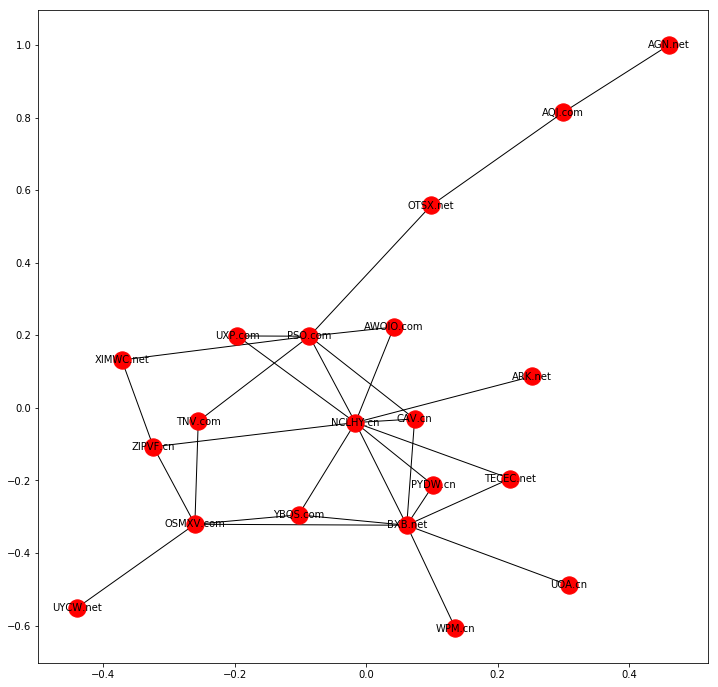

In [136]:
plt.figure(3, figsize=(12, 12))
nx.draw_networkx(website_network, font_size = 10)

In [137]:
sorted(nx.pagerank(website_network).items(),key=lambda x:x[1], reverse=True)

[('NCLHY.cn', 0.14458373648850112),
 ('BXB.net', 0.12167651946631422),
 ('PSO.com', 0.11869189427925421),
 ('OSMXV.com', 0.07900392412117926),
 ('AQJ.com', 0.04894187384579521),
 ('ZIPVF.cn', 0.04748555042914926),
 ('YBQS.com', 0.04614852547478334),
 ('CAV.cn', 0.0453291340590865),
 ('OTSX.net', 0.04091414623486361),
 ('XIMWC.net', 0.03356557699982217),
 ('TNV.com', 0.033542034474908576),
 ('TECEC.net', 0.03271781252948063),
 ('PYDW.cn', 0.03271781252948063),
 ('UXP.com', 0.032400974828253666),
 ('AWOIO.com', 0.032400974828253666),
 ('AGN.net', 0.028302824705257745),
 ('UYCW.net', 0.020930712945302708),
 ('WPM.cn', 0.020428159230832833),
 ('UOA.cn', 0.020428159230832833),
 ('ARK.net', 0.019789653298647798)]